 - Student name: Michael Holthouser
 - Student pace: flex 
 - Scheduled project review date/time: 
 - Instructor name: Abhineet Kulkarni
 - Blog post URL: 

# Introduction
---

SyriaTel has tasked me to provide prediction analysis on whether their customers will churn soon. To churn in its broadest sense according to wikipedia is, "A measure of the number of individuals or items moving out of a collective group over a specific period."  



# Stakeholder:

- SyriaTel upper management

# Data:

The title of this dataset is called "Churn in Telecom's dataset" from <a href="https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset">kaggle.com</a>

- Number of records: 3333
- Number of columns: 20
- Target variable: <b>churn</b>

# Import Libararies 
---
Firstly, we must import the necessary library packages for this project. 

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler


from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc

from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

# Column Descriptions
---
- <code><b>state</b></code>, string. 2-letter code of the US state of customer residence
- <code><b>account_length</b></code>, numerical. Number of months the customer has been with the current telco provider
- <code><b>area_code</b></code>, string="area_code_AAA" where AAA = 3 digit area code.
- <code><b>international_plan</b></code>, (yes/no). The customer has international plan.
- <code><b>voice_mail_plan</b></code>, (yes/no). The customer has voice mail plan.
- <code><b>number_vmail_messages</b></code>, numerical. Number of voice-mail messages.
- <code><b>total_day_minutes</b></code>, numerical. Total minutes of day calls.
- <code><b>total_day_calls</b></code>, numerical. Total minutes of day calls.
- <code><b>total_day_charge</b></code>, numerical. Total charge of day calls.
- <code><b>total_eve_minutes</b></code>, numerical. Total minutes of evening calls.
- <code><b>total_eve_calls</b></code>, numerical. Total number of evening calls.
- <code><b>total_eve_charge</b></code>, numerical. Total charge of evening calls.
- <code><b>total_night_minutes</b></code>, numerical. Total minutes of night calls.
- <code><b>total_night_calls</b></code>, numerical. Total number of night calls.
- <code><b>total_night_charge</b></code>, numerical. Total charge of night calls.
- <code><b>total_intl_minutes</b></code>, numerical. Total minutes of international calls.
- <code><b>total_intl_calls</b></code>, numerical. Total number of international calls.
- <code><b>total_intl_charge</b></code>, numerical. Total charge of international calls
- <code><b>number_customer_service_calls</b></code>, numerical. Number of calls to customer service
- <code><b>churn</b></code>, (yes/no). Customer churn - target variable.

# Loading The Data
---
The next step is to extract the data and put in a pandas dataframe, and to print the first 5 rows to see if the data was imported correctly. 

In [117]:
data = pd.read_csv('churn_telecom.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Exploring and Cleaning the data
---
Below I am exploring the data, and checking what the data types of each columns with the .info() function, the descriptive statistics of the data with the .describe() function, and finally I will check for any missing data using the .isna() function. 

In [118]:
# inspect how many records there are, and the data types for each column. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

At first glance, it appears for the most part the columns that are numerical are the correct data type. However, there are a couple columns that are the object data type that need to be changed to something numerical. The "international plan" and the "voice mail plan" have entries in the form of "yes" or "no" need to be changed to 1 for "yes" and 0 for "no". Likewise the "churn" column needs to be changed into a different data type and will the have entries changed to numerical entries such as 1 for "True" and 0 for "False".

In [119]:
# Descriptive statistics on each column of the dataset
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The data looks normal without and large outliers glooming. 

In [120]:
# Inspect the dataset to see if there is any missing data
data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Great! there is no missing values to take care of.  However, I will next add an underscore "_" as that is conventional in the python language. 

In [121]:
data.columns = data.columns.map(lambda col: col.replace(' ','_'))
print(data.columns)

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')


Next I shall check the unique values of the dataset to see if there are any place holders for missing values. 

In [122]:
# inspect unique values of columns to identify potention errors or null values:
for col in data.columns:
    print(f"{col} vals:  {data[col].unique()} \n")

state vals:  ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND'] 

account_length vals:  [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 1

Some things I noticed: 
- <b>States</b> look good.
- There are only 3 area codes
- "<b>international_plan</b>", "<b>voice_mail_plan</b>" have yes/no values and will need to be changed to a 1 and 0. 
- Phone number can probably be dropped from the dataset because, it shouldn't be a reason why customer is choosing to churn. 
- The target variable "<b>churn</b>" has a boolean value, and needs to be changed to a 1 and 0.


In [123]:
data['international_plan'] = data['international_plan'].map({'no': 0, 'yes': 1})
data['voice_mail_plan'] = data['voice_mail_plan'].map({'no': 0, 'yes': 1})
data['churn'] = data['churn'].map({False: 0, True: 1})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   int64  
 5   voice_mail_plan         3333 non-null   int64  
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [124]:
# Drop the phone_number column from the dataset 
data.drop("phone_number", axis=1, inplace=True)

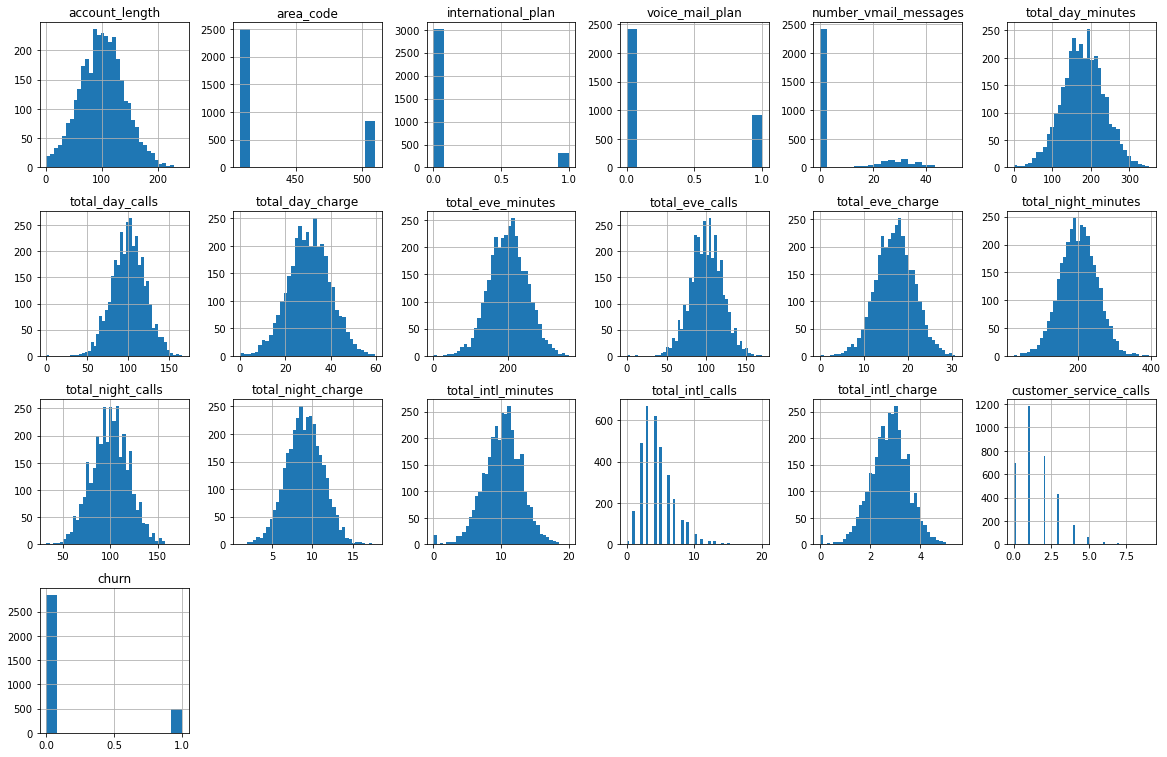

In [125]:
data.hist(bins = 'auto', layout = (6,6), figsize = (20,20))
plt.show()

## Exploration and Visualization of Churn Data
---
Next I am curious and want visualize what the number of customers have churned and their percentages. 

In [126]:
print("Churn Counts")
print(data["churn"].value_counts())
print()
print("Percentages")
print(data["churn"].value_counts(normalize=True))

Churn Counts
0    2850
1     483
Name: churn, dtype: int64

Percentages
0    0.855086
1    0.144914
Name: churn, dtype: float64


Of the 3333 customers from the data set <b>14.5%</b> have terminated their service with SyriaTel. I am curious if a certain area code has a greater number of churns over the other.  

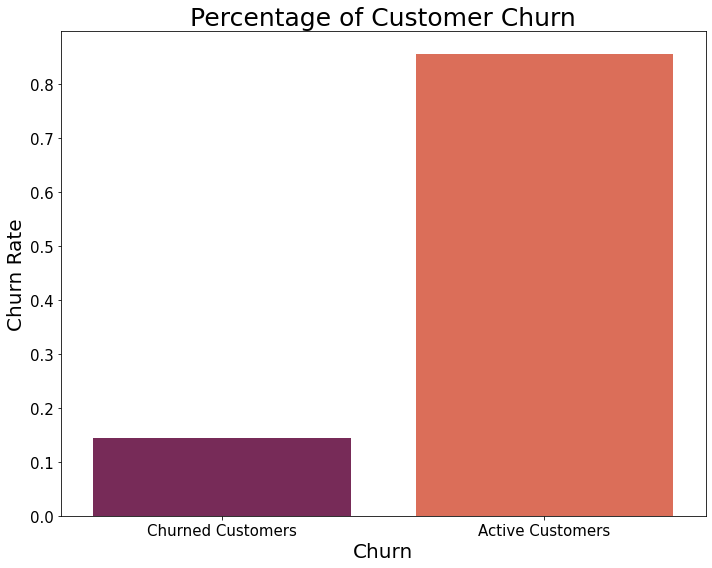

In [127]:
# Percentages of current customers vs customer churn
churn_per = data["churn"].value_counts(normalize=True)

# Plot of percentages 
fig, ax = plt.subplots(figsize = (10, 8))
sns.barplot(x = [0, 1], y = data["churn"], palette="rocket", data = churn_per, ax = ax)
plt.title('Percentage of Customer Churn', fontsize = 25)
ax.tick_params(axis='both', labelsize=15)
plt.xlabel('Churn', fontsize=20)
plt.ylabel('Churn Rate', fontsize=20)
ax.set_xticklabels(['Churned Customers', 'Active Customers'])
plt.tight_layout()

area_code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64


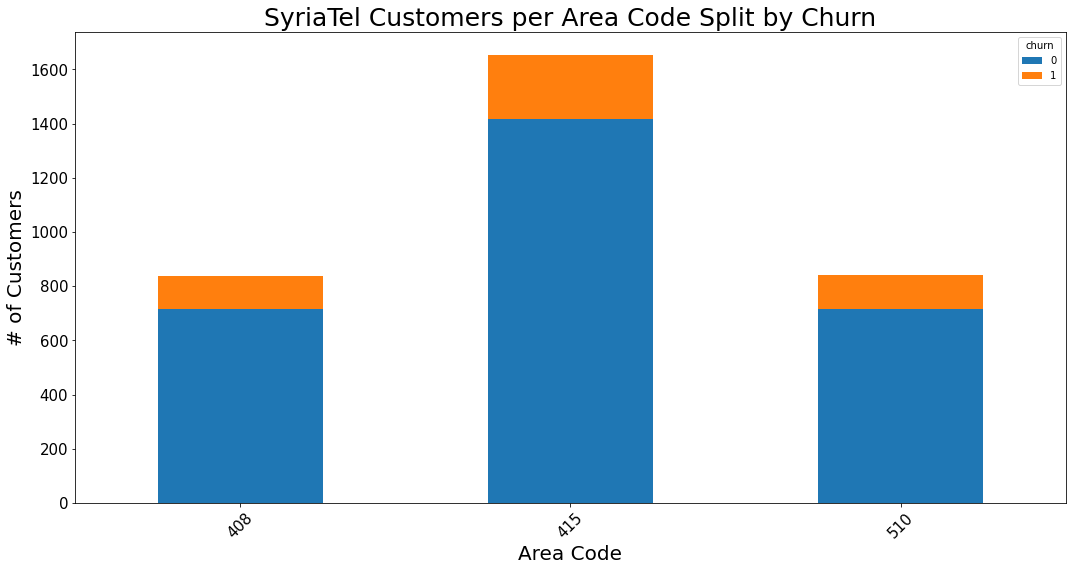

In [128]:
# percentage of churn by area code
print(data.groupby(["area_code"])['churn'].mean())

fig, ax = plt.subplots(figsize = (15, 8))
data.groupby(['area_code', 'churn']).size().unstack().plot(kind='bar', stacked=True, ax = ax);
plt.title('SyriaTel Customers per Area Code Split by Churn', fontsize = 25)
ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Area Code', fontsize = 20)
plt.ylabel('# of Customers', fontsize = 20)
plt.tight_layout()

##rotate x-axis to a 45 degree angle 
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)

After further investigation, it is clear that the 415 area code has more customers than the 408 or 510 area codes. However, all three area codes have around the same <b>churn rate</b>.  Since there is no clear pattern, I believe it is safe to delete the area code column from the dataset as well. 
- <b>churn rate</b> – is the rate at which customers or clients are leaving a company within a specific period of time.

In [129]:
# Drop the area_code column from the dataset
data.drop('area_code', axis=1, inplace=True)

In [130]:
# Check to see if phone_number and area_code columns have been removed 
data.columns

Index(['state', 'account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'churn'],
      dtype='object')

In [131]:
state_dum = pd.get_dummies(data['state'], drop_first=True)

In [132]:
data_final = data.drop('state', axis=1)

In [133]:
data_final = pd.concat([data_final, state_dum], axis=1)
data_final.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,0,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,0,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,0,0


## Prepare Data for Modeling 

### Create X, y variables

In [134]:
# Create X
X = data_final.drop('churn', axis=1)

# Create y
y = data_final['churn']

### Train, Test, Split


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Baseline Model 

### Logistic Regression 

In [136]:
# Initialize logistic regression
logreg = LogisticRegression(solver= 'liblinear', random_state=42)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

#### Get Predictions

In [137]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

#### Classification report of the training data

In [138]:
display(confusion_matrix(y_train, y_hat_train))
print(classification_report(y_train, y_hat_train))

array([[2099,   42],
       [ 278,   80]])

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2141
           1       0.66      0.22      0.33       358

    accuracy                           0.87      2499
   macro avg       0.77      0.60      0.63      2499
weighted avg       0.85      0.87      0.84      2499



#### Check for imbalance

In [139]:
# check for imbalance of the training data
y_train.value_counts()

0    2141
1     358
Name: churn, dtype: int64

There appears to be some imbalance with our data. Due to this factor <b>recall</b> would be a good measure to go with. Recall is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. 

#### Classification report of the testing data

In [140]:
display(confusion_matrix(y_test, y_hat_test))
print(classification_report(y_test, y_hat_test))

array([[688,  21],
       [106,  19]])

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       709
           1       0.47      0.15      0.23       125

    accuracy                           0.85       834
   macro avg       0.67      0.56      0.57       834
weighted avg       0.81      0.85      0.81       834



In [141]:
y_test.value_counts()

0    709
1    125
Name: churn, dtype: int64

## Model 2: Decision Tree

### Train the Decision Tree

In [142]:
clf = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 2, min_samples_split = 5, random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [143]:
clf.score(X_test, y_test)

0.9364508393285371

In [144]:
clf.score(X_train, y_train)

0.954781912765106

### Feature Importance 

Next we will examine how important each feature ended up being in our decision tree model. In machine learninge, feature selection is an important step. More features equals more complex models that take longer to train and are harder to interpret. 

In [145]:
# Feature importance 
clf.feature_importances_

array([0.        , 0.11380956, 0.        , 0.06003622, 0.06944459,
       0.00210411, 0.25680227, 0.04933145, 0.        , 0.07894377,
       0.        , 0.        , 0.01590009, 0.08195506, 0.11626561,
       0.        , 0.15540728, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

This array full of numbers isn't very helpful. Let's plot the data to see if the important features become more clear. 

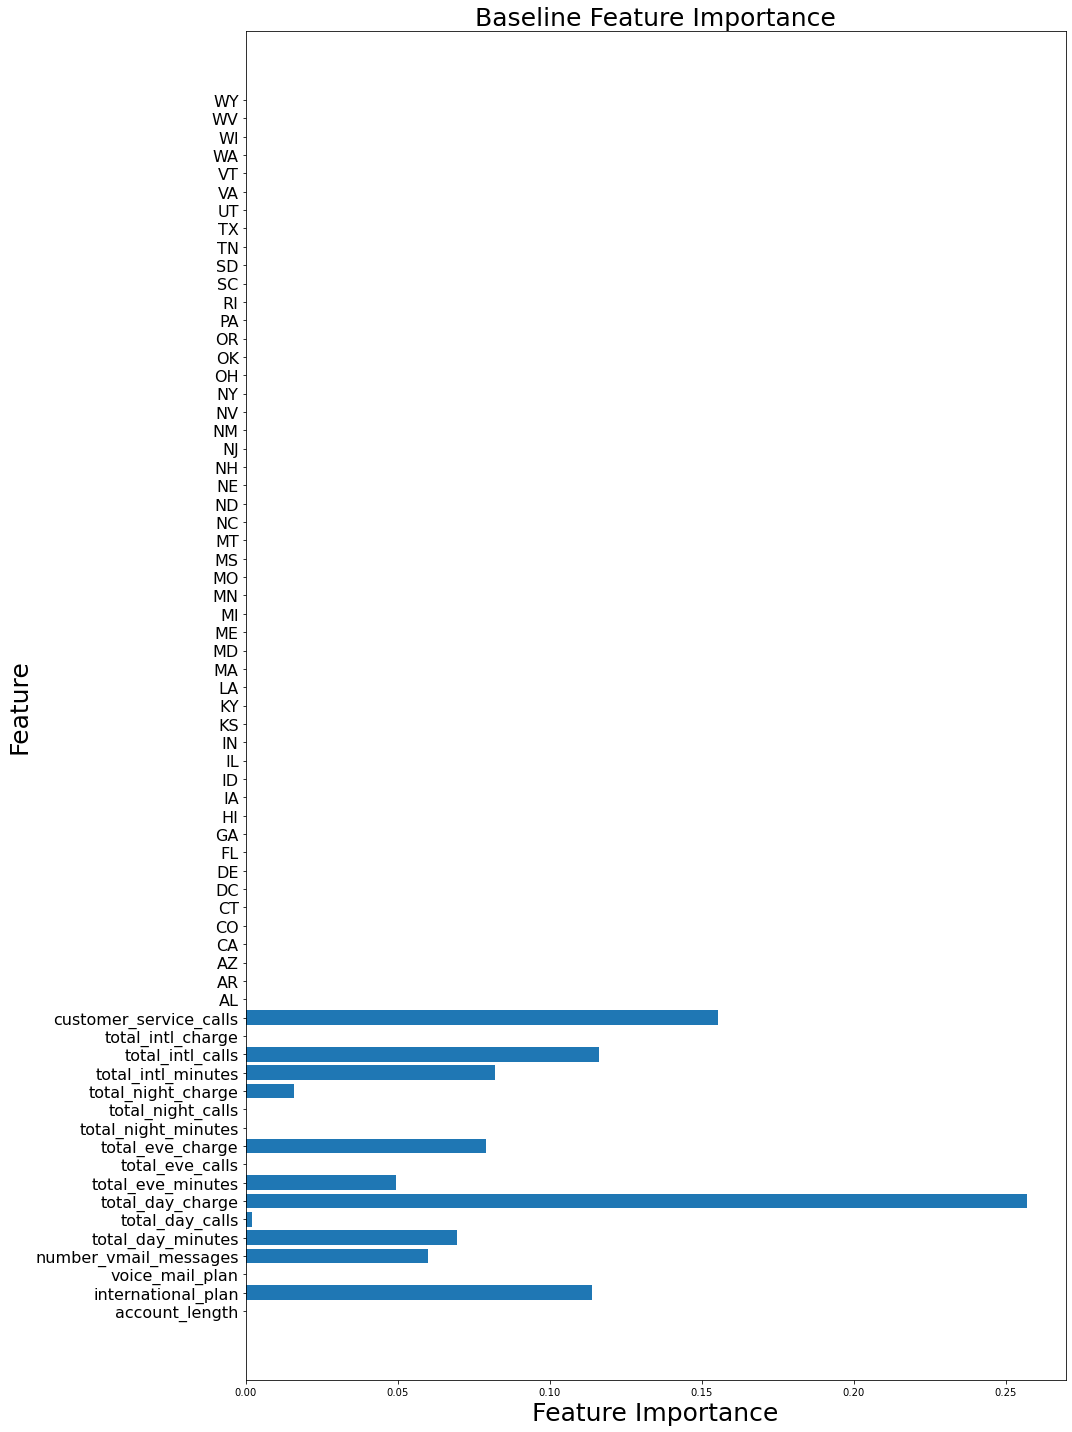

In [146]:
def plot_features_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(15,20))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values, fontsize = 16)
    plt.xlabel('Feature Importance', fontsize = 25)
    plt.ylabel('Feature', fontsize = 25)
    plt.title('Baseline Feature Importance', fontsize = 25)
    plt.tight_layout()
    
plot_features_importances(clf)

we can see from this feature imprtance graph that there are four features that the model is weighing more heavily, with little to no weight given to the states.  

- <code><b>total_day_charge</b></code>
- <code><b>customer_service_calls</b></code>
- <code><b>total_int_charge</b></code>

#### Correlation

Let's confirm our finding from the feature importance graph with how strong the correlation is between our features and our target variable churn. 

In [147]:
churn_corr = data.corr()['churn'].map(abs).sort_values(ascending=False)
churn_corr

churn                     1.000000
international_plan        0.259852
customer_service_calls    0.208750
total_day_minutes         0.205151
total_day_charge          0.205151
voice_mail_plan           0.102148
total_eve_minutes         0.092796
total_eve_charge          0.092786
number_vmail_messages     0.089728
total_intl_charge         0.068259
total_intl_minutes        0.068239
total_intl_calls          0.052844
total_night_charge        0.035496
total_night_minutes       0.035493
total_day_calls           0.018459
account_length            0.016541
total_eve_calls           0.009233
total_night_calls         0.006141
Name: churn, dtype: float64

Looks like our graph was correct about our most weighted features in this particular model. However, total_day_minutes and total_day_charges are perfectly correlated. with this insight, one of these features could be dropped from our model. 

## Further EDA: Important features in relation to churn

### International plan

In [148]:
inter_churn = pd.DataFrame(data.groupby(['international_plan'])['churn'].mean())
inter_churn

,churn
international_plan,
0,0.114950
1,0.424149


Of the total number of customers with an international plan with SyriaTel, 42% of customers end up churning. On a business stand point, this may be a worthwhile topic to further investigate.   

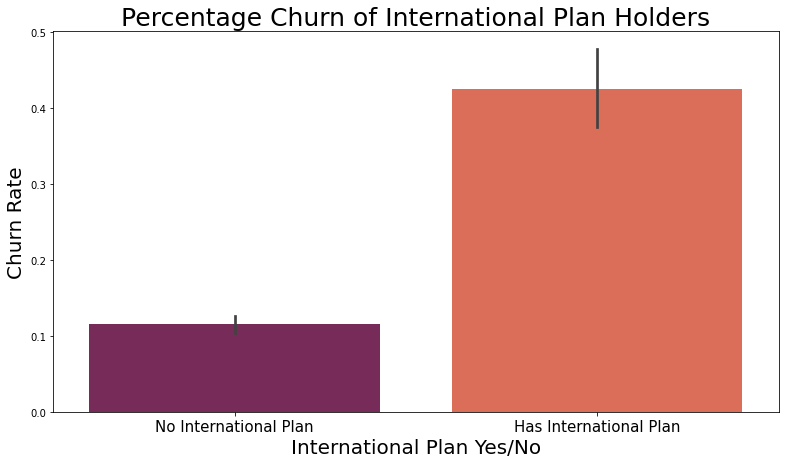

In [149]:
# Internationl plan bar plot 
fig, ax = plt.subplots(figsize=(13,7))
sns.barplot(data=data, x=data['international_plan'], y='churn', palette="rocket", ax = ax)
plt.title('Percentage Churn of International Plan Holders', fontsize=25)
plt.xlabel('International Plan Yes/No', fontsize=20)
plt.ylabel('Churn Rate', fontsize=20)
ax.set_xticklabels(['No International Plan', 'Has International Plan'], fontsize=15)
plt.tight_layout;

### Customer Service Calls

You would imagine the more calls a customer must make to customer service, the likely they are to be unhappy with their phone service. But how many calls on average does it take to increase the likely hood for a customer to churn. Let's take a look. 

In [150]:
cust_serv_calls = pd.DataFrame(data.groupby(['customer_service_calls'])['churn'].mean())
cust_serv_calls

,churn
customer_service_calls,
0,0.131994
1,0.103302
2,0.114625
3,0.102564
4,0.457831
5,0.606061
6,0.636364
7,0.555556
8,0.500000


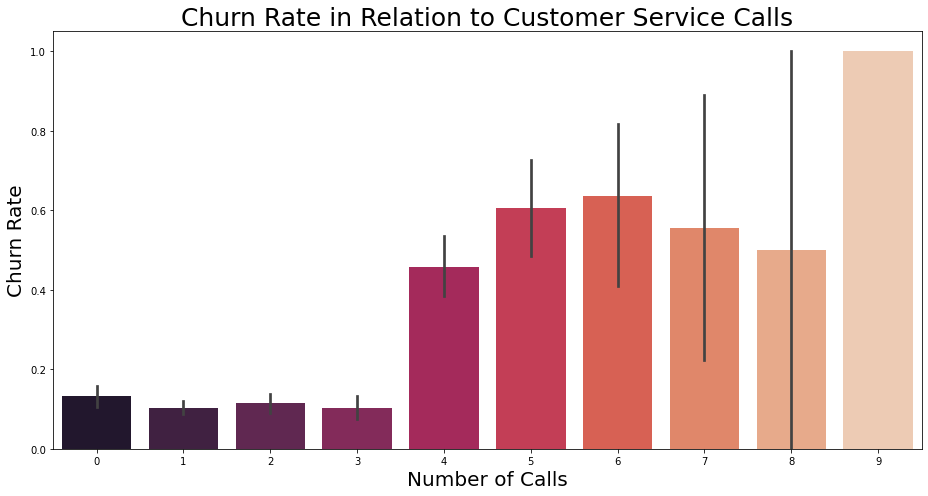

In [151]:
fig, ax = plt.subplots(figsize=(13,7))
sns.barplot(data=data, x=data['customer_service_calls'], y='churn',palette="rocket", ax = ax)
plt.title('Churn Rate in Relation to Customer Service Calls', fontsize=25)
plt.ylabel('Churn Rate', fontsize=20)
plt.xlabel('Number of Calls', fontsize=20)
plt.tight_layout();

From the graph above, it is evident that when a customer has to call customer service four times, the likely hood of a customer to churn significantly increases. When a customer needs to call a maximum 9 times, the churn rate reaches 100%. Looking at this in a business perspective, new strategies must discussed to handle a unhappy customer when they are calling customer service for the fourth time. 

### Total Day Charge

In [152]:
tot_day_char = pd.DataFrame(data_final.groupby(['total_day_charge'])['churn'].mean())
tot_day_char

,churn
total_day_charge,
0.00,0.5
0.44,0.0
1.33,0.0
1.34,0.0
2.13,0.0
...,...
57.04,1.0
57.36,1.0
58.70,1.0


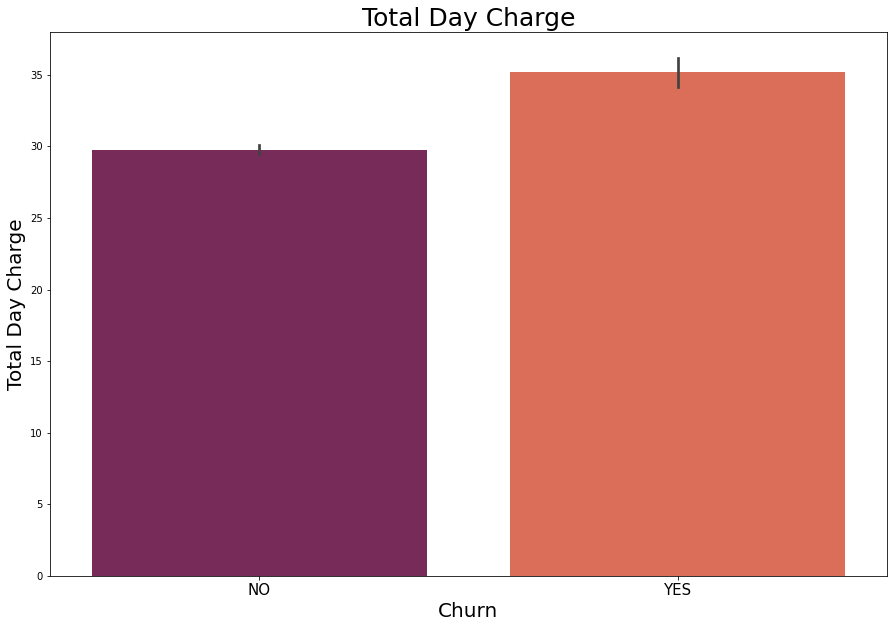

In [153]:
# total_day_charge plan bar plot 
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=tot_day_char, y=data_final['total_day_charge'], x=data_final['churn'], palette="rocket", ax = ax)
plt.title('Total Day Charge', fontsize=25)
plt.xlabel('Churn', fontsize=20)
plt.ylabel('Total Day Charge', fontsize=20)
ax.set_xticklabels(['NO', 'YES'], fontsize=15)
plt.tight_layout;

From the image above, it appears that at around $54 is when we begin to see a 100 percent churn rate. I recommend possibly adding more benefits to those customers who are paying this amount for their plan. Adding more incentives could keep your customers around believing that the plan is worth the money. 

### Evalutate the Predictive Performance 

In [154]:
# Make prediction for test data
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

#### Display classification report for training data

In [155]:
#print confusion matrix and classification report
display(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

array([[2129,   12],
       [ 101,  257]])

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2141
           1       0.96      0.72      0.82       358

    accuracy                           0.95      2499
   macro avg       0.96      0.86      0.90      2499
weighted avg       0.95      0.95      0.95      2499



#### Display classification report for test data

In [156]:
#print confusion matrix and classification report

display(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

array([[699,  10],
       [ 43,  82]])

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       709
           1       0.89      0.66      0.76       125

    accuracy                           0.94       834
   macro avg       0.92      0.82      0.86       834
weighted avg       0.93      0.94      0.93       834



Now, let's check the model's accuracy

In [157]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, y_pred) * 100))

Testing Accuracy for Decision Tree Classifier: 93.65%


### Tuning the model with GridSearchCV

In [158]:
# GridSearchCV to find best combination of parameters. 
clf = DecisionTreeClassifier()

#define a param grid
grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 6, 10],
    'min_samples_split': [1, 5, 7, 10, 20]
}

#fit the gridsearch 
gs_tree = GridSearchCV(clf, param_grid=grid, cv=5)
gs_tree.fit(X_train, y_train)

#Print the best parameters
gs_tree.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 10}

#### Make predictions with gridsearch recommended parameters

In [159]:
# make predictions for test and training data
y_pred_grid = gs_tree.predict(X_test)
y_pred_grid_train = gs_tree.predict(X_train)

#### Classification report for training data

In [160]:
# print classification report and confusion matrix for training data
display(confusion_matrix(y_train, y_pred_grid_train))
print(classification_report(y_train, y_pred_grid_train))

array([[2128,   13],
       [  90,  268]])

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2141
           1       0.95      0.75      0.84       358

    accuracy                           0.96      2499
   macro avg       0.96      0.87      0.91      2499
weighted avg       0.96      0.96      0.96      2499



#### Classification report for test data

In [161]:
#print confusion matrix and classification report for test data
display(confusion_matrix(y_test, y_pred_grid))
print(classification_report(y_test, y_pred_grid))

array([[698,  11],
       [ 34,  91]])

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       709
           1       0.89      0.73      0.80       125

    accuracy                           0.95       834
   macro avg       0.92      0.86      0.89       834
weighted avg       0.94      0.95      0.94       834



In [162]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, y_pred_grid) * 100))

Testing Accuracy for Decision Tree Classifier: 94.6%


# Model 2: Random Forest Classifier

### Create X and y variables

In [163]:
# assign X and y variables
X = data_final.drop('churn', axis =1)
y = data_final['churn']

### Split the data into training and testing sets

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Fit a random forest model

In [165]:
#Instantiate and fit a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

### Check the training and testing accuracy 

In [166]:
# Training accuracy score
rf.score(X_train, y_train)

0.8939575830332133

In [167]:
# Test accuracy score
rf.score(X_test, y_test)

0.8609112709832134

### Get prediction and build classification report 

#### Get predictions for training and test data

In [168]:
# get predictions
y_preds = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

#### Print confusion matrix and classification report for test data

In [169]:
#build a confusion matrix and classification report 
display(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))

array([[706,   3],
       [113,  12]])

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       709
           1       0.80      0.10      0.17       125

    accuracy                           0.86       834
   macro avg       0.83      0.55      0.55       834
weighted avg       0.85      0.86      0.81       834



### Tuning the model with GridSearchCV

In [170]:
param_grid = {'criterion':['gini','entropy'],
              'max_depth':[3,6,9,12],
              'min_samples_leaf': [5,10,12],
              'n_estimators': [10, 12, 15, 20]
             }

### Fit the gridsearch 

In [171]:
rfc = RandomForestClassifier(n_estimators=10, max_depth=5)
grid_rfc =GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, 12],
                         'min_samples_leaf': [5, 10, 12],
                         'n_estimators': [10, 12, 15, 20]},
             scoring='accuracy')

### Display the gridsearch results 

In [172]:
# Print the best parameters 
grid_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 5,
 'n_estimators': 20}

### Get predictions from gridsearch 

In [173]:
# get predictions from the gridsearch 
y_preds_grid = grid_rfc.predict(X_test)

In [174]:
#print confusion matrix and classification report
display(confusion_matrix(y_test, y_preds_grid))
print(classification_report(y_test, y_preds_grid))

array([[709,   0],
       [ 79,  46]])

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       709
           1       1.00      0.37      0.54       125

    accuracy                           0.91       834
   macro avg       0.95      0.68      0.74       834
weighted avg       0.91      0.91      0.89       834



In [349]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, y_preds_grid) * 100))

Testing Accuracy for Decision Tree Classifier: 91.37%
